# Annotation Processing

**In this Notebook**:  
Annotation files by different annotators (for a given `AnnotationTask` object) are loaded together in an `AnnotationSet` object. This allows to compute:
- annotator statistics (distribution of labels, nb of annotations)
- IAA scores  
- confusion matrices between pairs of annotators 

This also allows to extract the subset of annotations which are found to be  **ambiguous** and need adjudication (annotator disagreement / comments left, indicating doubts).

In [1]:
import pandas as pd
import os
import sys
sys.path.append("../")
from utils.anno import AnnotationSet, AnnotationTask
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Initial annotation trial  
4 annotators : anno1, anno2 with 10 papers (987 sentences) to annotate; anno3, anno4 with 4 papers (246 sentences) to annotate. Guidelines: v1.

### 1. Create `AnnotationTask` and `AnnotationSet`

In [2]:
ANNO_DIR_PATH = "anno-results-1/"

task = AnnotationTask(
    title = "claims-classification",
    guidelines_path = "guidelines_v1.md",
    labels = ["POS", "NEG", "FACT", "PROSP", "NC"],
    annotators = ["anno1", "anno2", "anno3", "anno4"],
)


aset = AnnotationSet(ANNO_DIR_PATH, task = task)

### 2. Access the annotations, annotator statistics, IA metrics

In [3]:
aset.annotations.head()

,doccano_art_id,sentence_id,text,current_sentence_section,previous_sentence_section,previous_sentence,next_sentence_section,next_sentence,label_anno1,comments_anno1,label_anno2,comments_anno2,label_anno3,comments_anno3,label_anno4,comments_anno4
0,0,0,In this paper we report on a research effort f...,abstract,NaN,NaN,abstract,Three sequential models have been developed fo...,FACT,,FACT,,FACT,,FACT,
1,0,1,Three sequential models have been developed fo...,abstract,abstract,In this paper we report on a research effort f...,abstract,The models have been applied to a Danish and a...,FACT,,FACT,,FACT,,NC,
2,0,2,The models have been applied to a Danish and a...,abstract,abstract,Three sequential models have been developed fo...,abstract,"Moreover, during the reported research, a meth...",POS,j'hésite entre POS et FACT,POS,,POS,,POS,
3,0,3,"Moreover, during the reported research, a meth...",abstract,abstract,The models have been applied to a Danish and a...,Introduction,One of the problems relating to sign language ...,FACT,,FACT,,POS,,POS,
4,0,4,One of the problems relating to sign language ...,Introduction,abstract,"Moreover, during the reported research, a meth...",Introduction,"Therefore, most data collections contain a ver...",NC,,NC,,NC,,NC,


In [4]:
aset.compute_agreement_metrics()

KeyError: 'idx'

In [5]:
aset.ia_metrics["cohen_kappa"]

,anno1,anno2,anno3,anno4
anno1,1.000000,0.697647,0.601697,0.092751
anno2,0.697647,1.000000,0.592787,0.057630
anno3,0.601697,0.592787,1.000000,0.080645
anno4,0.092751,0.057630,0.080645,1.000000


In [26]:
aset.ia_metrics["krippendorff_alpha"]

0.5827806440380325

In [27]:
anno_pairs = aset.compute_coincidences(split_multi_labels = False)
anno_pairs

{('FACT', 'FACT'): 43,
 ('FACT', 'NC'): 105,
 ('POS', 'POS'): 183,
 ('FACT', 'POS'): 27,
 ('NC', 'NC'): 857,
 ('NC', 'POS'): 170,
 ('NC', 'NEG'): 26,
 ('POS', 'PROSP'): 10,
 ('FACT#POS', 'FACT#POS'): 2,
 ('FACT#POS', 'POS'): 12,
 ('NC', 'NC#NEG'): 2,
 ('NC#NEG', 'POS'): 1,
 ('NEG', 'POS'): 13,
 ('NEG', 'NEG'): 5,
 ('FACT', 'FACT#NEG'): 1,
 ('PROSP', 'PROSP'): 7,
 ('FACT', 'FACT#POS'): 2,
 ('NEG#POS', 'POS'): 2,
 ('NEG', 'PROSP'): 2,
 ('NC', 'PROSP'): 2,
 ('NC#POS', 'POS'): 1}

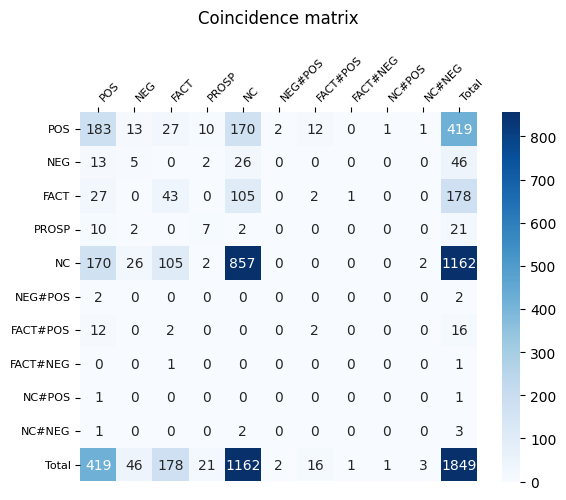

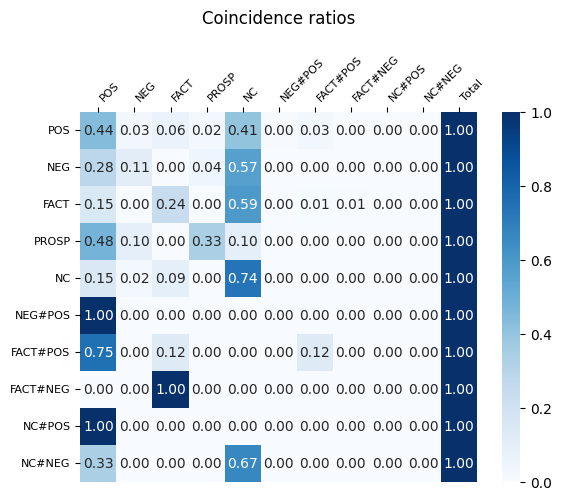

In [9]:
AnnotationSet.plot_coincidence_matrices(anno_pairs, task.multi_labels)

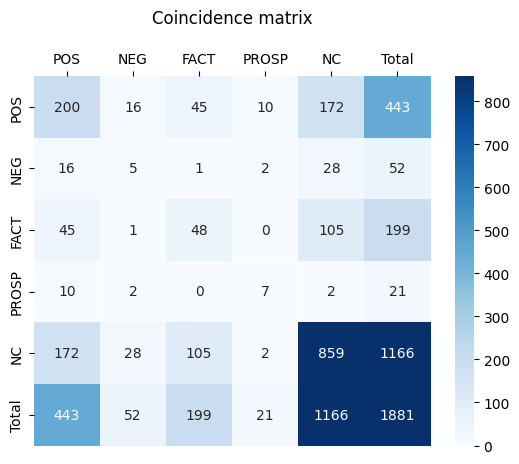

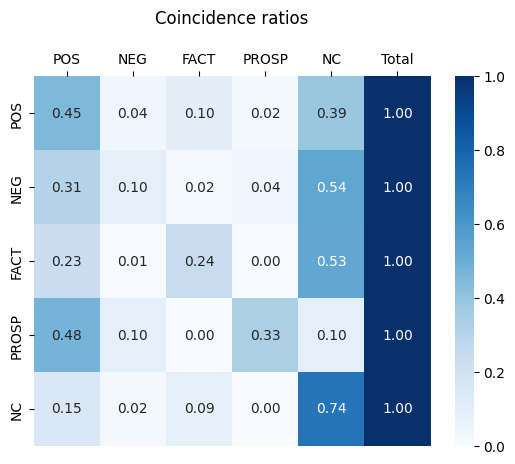

In [10]:
anno_pairs = aset.compute_coincidences(split_multi_labels = True)
AnnotationSet.plot_coincidence_matrices(anno_pairs, task.multi_labels)

In [12]:
aset.compute_ia_confusion_matrices()
cm = aset.ia_metrics["confusion_matrices"][0][3]
cm

array([[13,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 7,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0],
       [30,  6, 25,  0, 10]], dtype=int64)

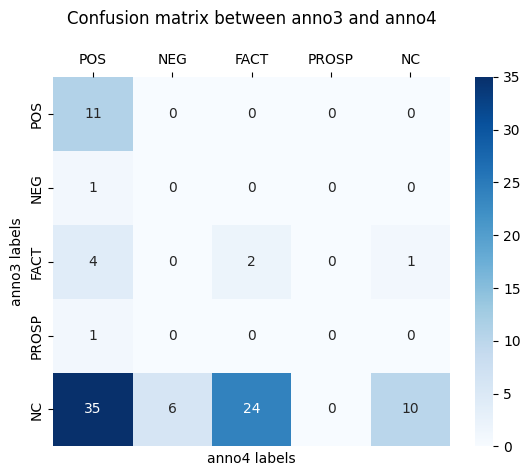

In [16]:
aset.plot_confusion_matrix_for_anno_pair(2, 3)

In [17]:
# from statsmodels.stats.inter_rater import aggregate_raters, fleiss_kappa

# data = []
# for i, row in aset.annotations.iterrows():
#     doc = str(row["doccano_art_id"]) + "-" + str(row["sentence_id"])
#     for anno in aset.task.annotators:
#         label = row[f"label_{anno}"]
#         if label == "":
#             continue

#         data.append([doc, anno, label])

# df = pd.DataFrame(data, columns=["doc", "anno", "label"])
# df

,doc,anno,label
0,0-0,anno1,FACT
1,0-0,anno2,FACT
2,0-0,anno3,FACT
3,0-1,anno1,FACT
4,0-1,anno2,FACT
...,...,...,...
2015,9-232,anno2,NC
2016,9-233,anno1,POS
2017,9-233,anno2,POS
2018,9-234,anno1,PROSP


In [14]:
aset.stats

,POS,NEG,FACT,PROSP,NC,total,POS_rr,NEG_rr,FACT_rr,PROSP_rr,NC_rr,completion_r
anno1,185,7,47,14,740,984,0.188008,0.007114,0.047764,0.014228,0.752033,0.996960
anno2,187,24,54,11,717,987,0.189463,0.024316,0.054711,0.011145,0.726444,1.000000
anno3,13,1,7,1,78,100,0.130000,0.010000,0.070000,0.010000,0.780000,0.101317
anno4,56,7,26,0,11,100,0.560000,0.070000,0.260000,0.000000,0.110000,0.101317


### 3. Access the ambiguous sentences

In [28]:
df = aset.get_ambiguous_annotations()
df.head()

,doccano_art_id,sentence_id,text,current_sentence_section,previous_sentence_section,previous_sentence,next_sentence_section,next_sentence,label_anno1,comments_anno1,label_anno2,comments_anno2,label_anno3,comments_anno3,label_anno4,comments_anno4,maj_label,agreement,commented
1,0,1,Three sequential models have been developed fo...,abstract,abstract,In this paper we report on a research effort f...,abstract,The models have been applied to a Danish and a...,FACT,,FACT,,FACT,,NC,,FACT,False,False
2,0,2,The models have been applied to a Danish and a...,abstract,abstract,Three sequential models have been developed fo...,abstract,"Moreover, during the reported research, a meth...",POS,j'hésite entre POS et FACT,POS,,POS,,POS,,POS,True,True
3,0,3,"Moreover, during the reported research, a meth...",abstract,abstract,The models have been applied to a Danish and a...,Introduction,One of the problems relating to sign language ...,FACT,,FACT,,POS,,POS,,FACT,False,False
7,0,7,"Thus, we developed a system in the direction o...",Introduction,Introduction,This characteristic makes it very unlikely for...,Introduction,This way we can extract a dataset with a lot o...,FACT,,FACT,,FACT,,POS,,FACT,False,False
8,0,8,This way we can extract a dataset with a lot o...,Introduction,Introduction,"Thus, we developed a system in the direction o...",Datasets,For the purposes of the project two collection...,POS,pas sûre,NC,,POS,,,,POS,False,True


In [29]:
df.shape

(211, 19)

In [30]:
len(df[df["commented"] == True])

27

In [31]:
df_ambig = df.drop(columns = ["agreement", "commented"])

In [32]:
df_ambig.columns

Index(['doccano_art_id', 'sentence_id', 'text', 'current_sentence_section',
       'previous_sentence_section', 'previous_sentence',
       'next_sentence_section', 'next_sentence', 'label_anno1',
       'comments_anno1', 'label_anno2', 'comments_anno2', 'label_anno3',
       'comments_anno3', 'label_anno4', 'comments_anno4', 'maj_label'],
      dtype='object')

In [33]:
df_ambig = df_ambig[["text", "maj_label", "doccano_art_id", "sentence_id", "label_anno1", "comments_anno1", "label_anno2", "comments_anno2", "label_anno3", "comments_anno3", "label_anno4", "comments_anno4", "previous_sentence_section", "previous_sentence", "next_sentence_section", "next_sentence"]]

In [34]:
df_ambig.head()

,text,maj_label,doccano_art_id,sentence_id,label_anno1,comments_anno1,label_anno2,comments_anno2,label_anno3,comments_anno3,label_anno4,comments_anno4,previous_sentence_section,previous_sentence,next_sentence_section,next_sentence
1,Three sequential models have been developed fo...,FACT,0,1,FACT,,FACT,,FACT,,NC,,abstract,In this paper we report on a research effort f...,abstract,The models have been applied to a Danish and a...
2,The models have been applied to a Danish and a...,POS,0,2,POS,j'hésite entre POS et FACT,POS,,POS,,POS,,abstract,Three sequential models have been developed fo...,abstract,"Moreover, during the reported research, a meth..."
3,"Moreover, during the reported research, a meth...",FACT,0,3,FACT,,FACT,,POS,,POS,,abstract,The models have been applied to a Danish and a...,Introduction,One of the problems relating to sign language ...
7,"Thus, we developed a system in the direction o...",FACT,0,7,FACT,,FACT,,FACT,,POS,,Introduction,This characteristic makes it very unlikely for...,Introduction,This way we can extract a dataset with a lot o...
8,This way we can extract a dataset with a lot o...,POS,0,8,POS,pas sûre,NC,,POS,,,,Introduction,"Thus, we developed a system in the direction o...",Datasets,For the purposes of the project two collection...


In [36]:
df_ambig.to_csv("anno-results-1/ambig.csv", index = False)

In [37]:
df_ambig["maj_label"].value_counts()

maj_label
NC       130
POS       55
FACT      16
PROSP      8
NEG        2
Name: count, dtype: int64

In [20]:
a = aset.annotations
for l in task.labels:
    print(l)
    ex = a[(a["maj_label"] == l) & (a["agreement"] == True)]["text"].head(5)
    for e in ex:
        print(e)
    print()

POS
The models have been applied to a Danish and a Greek Sign Language dataset, providing results around 96%.
Experimental results on the United Nations Parallel Corpus show the proposed method gains in all tested combinations of language, up to 2.3 BLEU points.
In this way, the model will distinguish translation rules extracted in contexts in which the English symbol string "[X1] record [X2]" behaves as a verbal phrase, from contexts in which the same string acts as nominal phrase.
From the results, we can see that the proposed partial matching method of pivot subtrees in triangulation outperforms the standard triangulation method for all language pairs and achieves higher or almost equal scores than proposed exact matching method.
The exact matching method also outperforms the standard triangulation method in the majority of the language pairs, but has a lesser improvement than partial matching method.

NEG
However, our Spanish annotators had only six hours each, and there was no int

In [24]:
t = df_ambig[df_ambig["comments_anno3"] != ""]["text"].values

In [25]:
t

array(['Among various methods using pivot languages, one popular and effective method is the triangulation method (Utiyama and Isahara, 2007;Cohn and Lapata, 2007), which first combines sourcepivot and pivot-target translation models (TMs) into a source-target model, then translates using this combined model.',
       'Given this background, we hypothesize that disambiguation of these cases would be easier if the necessary syntactic information such as phrase structures are considered during pivoting.'],
      dtype=object)

### 4. Consensual sentences

In [23]:
data = []
from collections import Counter
for i, row in aset.annotations.iterrows():
    labels = [row[f"label_{anno}"] for anno in task.annotators if row[f"label_{anno}"] != ""]
    # sort by counts
    count = Counter(labels)
    labels_count = [(k, v) for k, v in sorted(count.items(), key = lambda item: item[1], reverse = True)]

    if len(labels_count) == 1: # all annotators agree
        data.append([row["doccano_art_id"], row["sentence_id"], row["text"], labels[0]])
    elif labels_count[0][1] > labels_count[1][1]: # there is a strict majority
        data.append([row["doccano_art_id"], row["sentence_id"], row["text"], labels_count[0][0]])

df = pd.DataFrame(data, columns = ["doccano_art_id", "sentence_id", "text", "label"])

In [24]:
df

,doccano_art_id,sentence_id,text,label
0,0,0,In this paper we report on a research effort f...,FACT
1,0,1,Three sequential models have been developed fo...,FACT
2,0,2,The models have been applied to a Danish and a...,POS
3,0,4,One of the problems relating to sign language ...,NC
4,0,5,"Therefore, most data collections contain a ver...",NC
...,...,...,...,...
856,9,230,Our approach is inspired by knowledge distilla...,NC
857,9,231,"In particular, we use the cross-attention scor...",NC
858,9,232,We compare different ways to aggregate the sco...,NC
859,9,233,We show that iteratively training the reader a...,POS


In [25]:
df.to_csv("approx-claims.csv", index = False)

## Second annotation trial

4 annotators, with 2 papers (176 sentences) to annotate.
Guidelines: v2.

In [2]:
ANNO_DIR_PATH = "anno-results-2/"

task = AnnotationTask(
    title = "claims-classification",
    guidelines_path = "guidelines_v2.pdf",
    labels = ["POS", "NEG", "FACT", "PROSP", "NC", "RW"],
    annotators = ["anno1", "anno2", "anno5", "anno6"],
)


aset = AnnotationSet(ANNO_DIR_PATH, task = task)

In [3]:
aset.annotations.head()

,idx,text,sec,prev_sec,prev_sent,next_sec,next_sent,label_anno1,comments_anno1,label_anno2,comments_anno2,label_anno5,comments_anno5,label_anno6,comments_anno6
0,3075788,We propose a software architecture designed to...,abstract,NaN,NaN,abstract,The Modular Architecture for Conversational Ag...,FACT,,FACT,,FACT,,POS,
1,3075789,The Modular Architecture for Conversational Ag...,abstract,abstract,We propose a software architecture designed to...,abstract,The architecture separates the domain of the c...,POS,,POS,,PROSP,,POS,
2,3075790,The architecture separates the domain of the c...,abstract,abstract,The Modular Architecture for Conversational Ag...,abstract,MACA provides tools to host dialogue agents on...,NC,,POS,,PROSP,,POS,
3,3075791,MACA provides tools to host dialogue agents on...,abstract,abstract,The architecture separates the domain of the c...,abstract,The current version of the framework already i...,FACT,,POS,,FACT,,POS,
4,3075792,The current version of the framework already i...,abstract,abstract,MACA provides tools to host dialogue agents on...,Introduction,Recent research in building sophisticated AIba...,FACT,,POS,,FACT,,POS,


In [4]:
aset.compute_agreement_metrics()

In [5]:
aset.ia_metrics["cohen_kappa"]

,anno1,anno2,anno5,anno6
anno1,1.000000,0.723103,0.727209,0.634671
anno2,0.723103,1.000000,0.617465,0.656656
anno5,0.727209,0.617465,1.000000,0.633973
anno6,0.634671,0.656656,0.633973,1.000000


<Axes: >

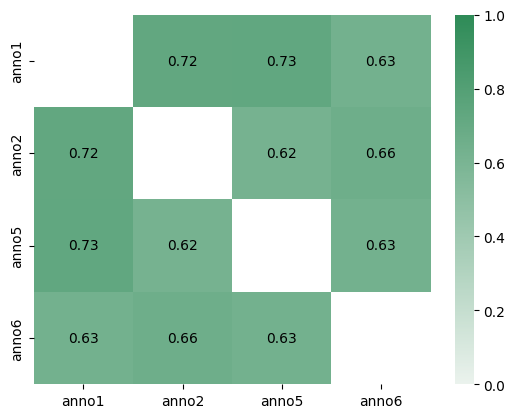

In [6]:
sns.heatmap(aset.ia_metrics["cohen_kappa"], cmap=sns.light_palette("seagreen", as_cmap=True), annot=True, vmin=0, vmax=1, mask=np.eye(4), annot_kws={"color": "black"})


In [7]:
print(aset.ia_metrics["krippendorff_alpha"])
aset.compute_krippendorff_alpha(split_multi_labels=True)
print(aset.ia_metrics["krippendorff_alpha"])

0.6644990828427608
0.671560225749785


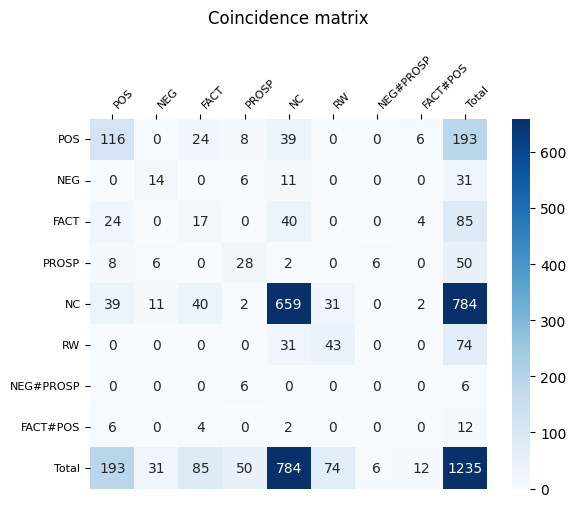

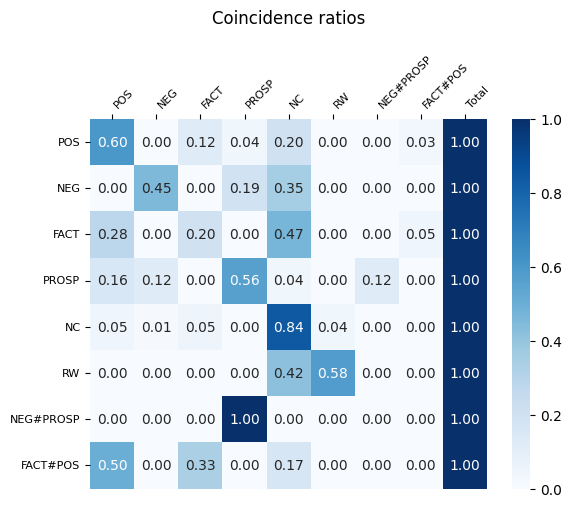

In [8]:
anno_pairs = aset.compute_coincidences(split_multi_labels = False)
AnnotationSet.plot_coincidence_matrices(anno_pairs, task.multi_labels)

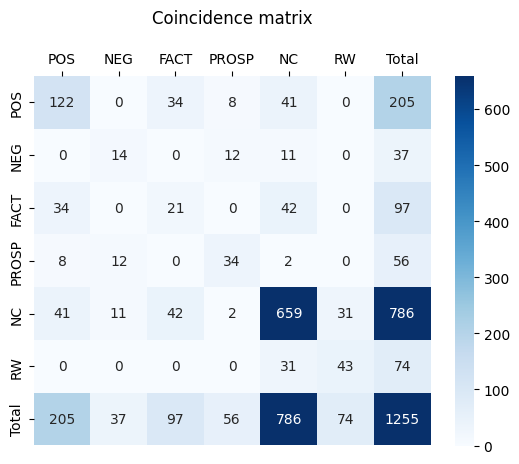

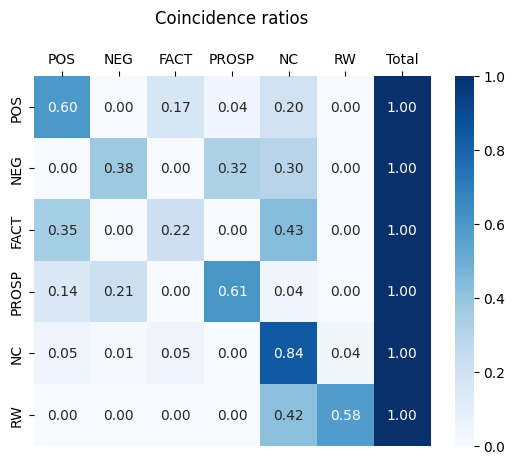

In [9]:
anno_pairs = aset.compute_coincidences(split_multi_labels = True)
AnnotationSet.plot_coincidence_matrices(anno_pairs, task.labels)

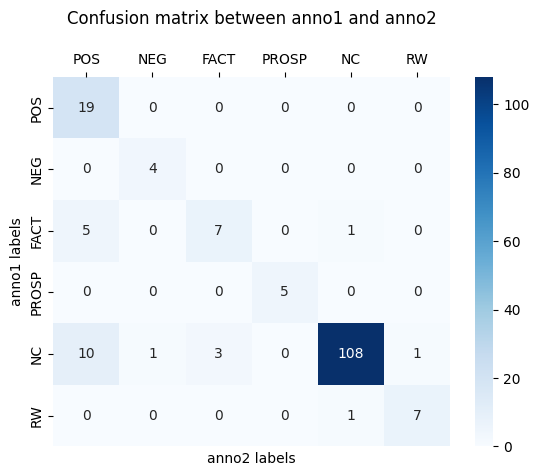

In [10]:
aset.plot_confusion_matrix_for_anno_pair(0, 1)

In [11]:
aset.annotations[aset.annotations["label_anno1"] != aset.annotations["label_anno2"]].shape

(26, 15)

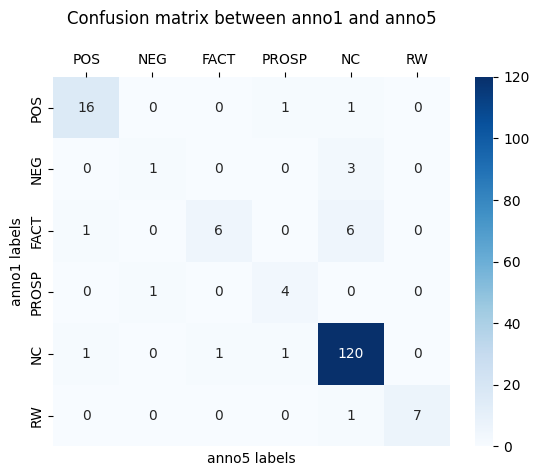

In [12]:
aset.plot_confusion_matrix_for_anno_pair(0, 2)

In [16]:
aset.stats["anno"] = [a for a in task.annotators]
aset.stats

,POS,NEG,FACT,PROSP,NC,RW,total,POS_rr,NEG_rr,FACT_rr,PROSP_rr,NC_rr,RW_rr,completion_r,anno
anno1,20,6,15,7,123,8,176,0.113636,0.034091,0.085227,0.039773,0.698864,0.045455,1.0,anno1
anno2,35,5,12,7,110,8,176,0.198864,0.028409,0.068182,0.039773,0.625000,0.045455,1.0,anno2
anno5,20,2,9,8,132,7,176,0.113636,0.011364,0.051136,0.045455,0.750000,0.039773,1.0,anno5
anno6,32,4,2,6,116,16,176,0.181818,0.022727,0.011364,0.034091,0.659091,0.090909,1.0,anno6


In [17]:
anno_labels = {}
for anno in task.annotators:
    l = aset.stats[aset.stats["anno"] == anno][task.labels].values[0].tolist()
    anno_labels[anno] = (int(l[0]), int(l[1]), int(l[2]), int(l[3]), int(l[4]), int(l[5]))

anno_labels

{'anno1': (20, 6, 15, 7, 123, 8),
 'anno2': (35, 5, 12, 7, 110, 8),
 'anno5': (20, 2, 9, 8, 132, 7),
 'anno6': (32, 4, 2, 6, 116, 16)}

In [18]:
for anno, labels in anno_labels.items():
    print(anno, labels)
    print()

anno1 (20, 6, 15, 7, 123, 8)

anno2 (35, 5, 12, 7, 110, 8)

anno5 (20, 2, 9, 8, 132, 7)

anno6 (32, 4, 2, 6, 116, 16)



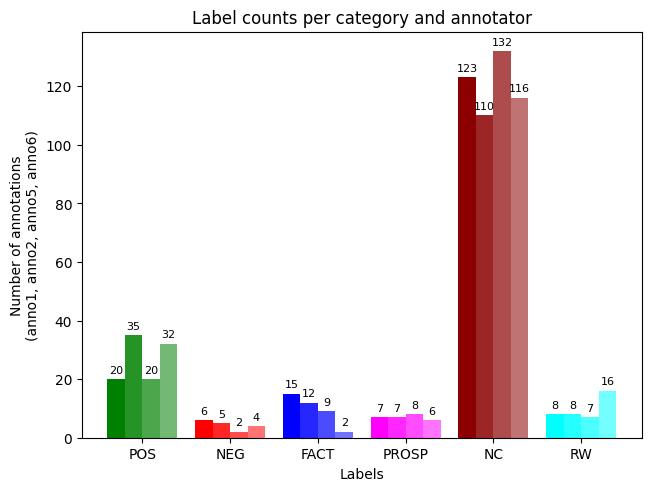

In [19]:
fig, ax = plt.subplots(layout = "constrained")

x = np.arange(len(task.labels))
width = 1/ (len(aset.task.annotators) + 1)
multiplier = 0

for anno, labels in anno_labels.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, labels, width, label = anno, color = sns.color_palette(["green", "red", "blue", "magenta", "darkred", "cyan"]), alpha = 1 - 0.15 * multiplier)
    ax.bar_label(rects, padding = 3, fontsize = 8)
    multiplier += 1

ax.set_ylabel(f"Number of annotations\n(anno1, anno2, anno5, anno6)")
ax.set_xlabel("Labels")
ax.set_title("Label counts per category and annotator")
ax.set_xticks(x + width * 1.5, task.labels)

plt.show()


In [20]:
art1 = aset.annotations[aset.annotations["idx"].astype(str).str.startswith("307")]
lab2idx = {l: i for i, l in enumerate(task.labels)}

a = []
for anno in task.annotators:
    labels = art1[f"label_{anno}"].values.tolist()
    idxs = [lab2idx[l] if l in lab2idx else 6 for l in labels]
    a.append(idxs)

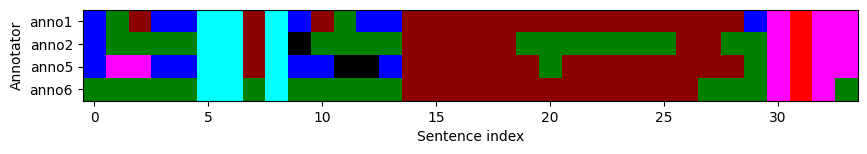

In [21]:
a = np.array(a)
colors = {0: "green", 1: "red", 2: "blue", 3: "magenta", 4: "darkred", 5: "cyan", 6: "black"}
rgb_map = {"green": [0, 128, 0], "red": [255, 0, 0], "blue": [0, 0, 255], "magenta": [255, 0, 255], "darkred": [139, 0, 0], "cyan": [0, 255, 255], "black": [0, 0, 0]}
rgb = {i:rgb_map[colors[i]] for i in range(7)}

fig = plt.figure(figsize = (10, 10))

img = np.array([[rgb[val] for val in row] for row in a], dtype = "B")
plt.imshow(img)
plt.xlabel("Sentence index")
plt.ylabel("Annotator")
plt.yticks(range(4), task.annotators)
plt.show()

In [22]:
art2 = aset.annotations[aset.annotations["idx"].astype(str).str.startswith("8")]
lab2idx = {l: i for i, l in enumerate(task.labels)}

3


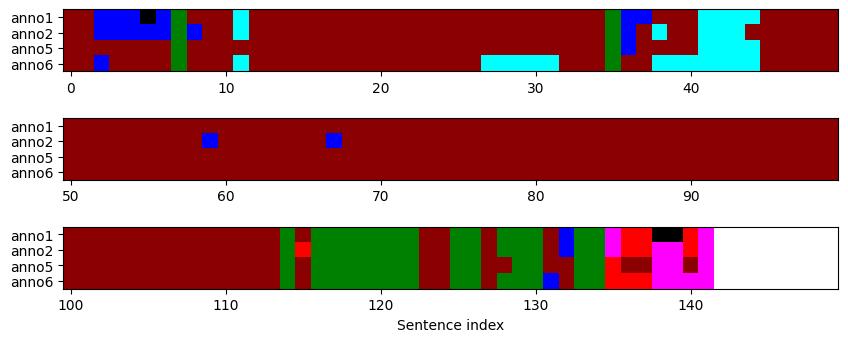

In [23]:
import matplotlib

a = []
for anno in task.annotators:
    labels = art2[f"label_{anno}"].values.tolist()
    idxs = [lab2idx[l] if l in lab2idx else 6 for l in labels]
    a.append(idxs)

a = np.array(a)

# split a in sub-arrays whose elements are of length 50 maximum
sub_arrays = []
for i in range(0, a.shape[1], 50):
    if i + 50 > a.shape[1]:
        # fill with 6 
        sub_arrays.append(np.pad(a[:, i:], ((0, 0), (0, 50 - (a.shape[1] - i))), mode = "constant", constant_values = 7))
    else:
        sub_arrays.append(a[:, i:i+50])

print(len(sub_arrays))


colors = {0: "green", 1: "red", 2: "blue", 3: "magenta", 4: "darkred", 5: "cyan", 6: "black", 7:"white"}
rgb_map = {"green": [0, 128, 0], "red": [255, 0, 0], "blue": [0, 0, 255], "magenta": [255, 0, 255], "darkred": [139, 0, 0], "cyan": [0, 255, 255], "black": [0, 0, 0], "white": [255, 255, 255]}
rgb = {i:rgb_map[colors[i]] for i in range(len(rgb_map))}

fig, axs = plt.subplots(len(sub_arrays), 1, figsize = (10, 4), squeeze = False, sharey = True, sharex = False)

for i, a in enumerate(sub_arrays):

    img = np.array([[rgb[val] for val in row] for row in a], dtype = "B")
    axs[i][0].imshow(img)

    plt.yticks(range(4), task.annotators)
    axs[i][0].set_xticks(range(0, 50, 10))
    axs[i][0].set_xticklabels(range(50*i, 50*(i+1), 10))


#plt.ylabel("Annotator")
plt.xlabel("Sentence index")
plt.show()

In [29]:
df_ambig = aset.annotations[aset.annotations["label_anno1"] != aset.annotations["label_anno2"]]
df_ambig = df_ambig.drop(columns = ["label_anno5", "comments_anno5", "label_anno6", "comments_anno6"])
df_ambig["label"] = [""] * df_ambig.shape[0]
df_ambig.to_csv("ambig-anno1-anno2.csv", index = False)

In [30]:
df_ambig

,idx,text,sec,prev_sec,prev_sent,next_sec,next_sent,label_anno1,comments_anno1,label_anno2,comments_anno2,label
2,3075790,The architecture separates the domain of the c...,abstract,abstract,The Modular Architecture for Conversational Ag...,abstract,MACA provides tools to host dialogue agents on...,NC,,POS,,
3,3075791,MACA provides tools to host dialogue agents on...,abstract,abstract,The architecture separates the domain of the c...,abstract,The current version of the framework already i...,FACT,,POS,,
4,3075792,The current version of the framework already i...,abstract,abstract,MACA provides tools to host dialogue agents on...,Introduction,Recent research in building sophisticated AIba...,FACT,,POS,,
9,3075797,"To address this gap, we propose a new, readyto...",Introduction,Introduction,"Furthermore, the different types of conversati...",Introduction,The architecture simplifies the specification ...,FACT,,FACT#POS,,
10,3075798,The architecture simplifies the specification ...,Introduction,Introduction,"To address this gap, we propose a new, readyto...",Introduction,The framework also maintains a clear separatio...,NC,,POS,,
12,3075800,MACA separates task definition from task selec...,Introduction,Introduction,The framework also maintains a clear separatio...,Introduction,The key characteristics of the MACA framework ...,FACT,,POS,,
13,3075801,The key characteristics of the MACA framework ...,Introduction,Introduction,MACA separates task definition from task selec...,Related Work,There are a few proposed frameworks in recent ...,FACT,,POS,,
19,3075807,This could include a database of previous coll...,Input,Input,This component represents an abstract input de...,Preprocessing,The Pre-processing module serves as a bridge b...,NC,,POS,,
20,3075808,"Through the output component, the architecture...",Output,Postprocessing,"In addition, these post-processing operations ...",Output,"Currently, implemented options are command lin...",NC,,POS,,
21,3075809,"Currently, implemented options are command lin...",Output,Output,"Through the output component, the architecture...",Output,"Similar to the Input component, the output com...",NC,,POS,,


In [26]:
claims = aset.get_consensual_annotations()
claims

,idx,text,label
0,3075788,We propose a software architecture designed to...,FACT
1,3075789,The Modular Architecture for Conversational Ag...,POS
2,3075790,The architecture separates the domain of the c...,POS
3,3075793,Recent research in building sophisticated AIba...,RW
4,3075794,These models have been applied to a variety of...,RW
...,...,...,...
160,8054606,"These triples gives model wrong supervisions, ...",NEG
161,8054607,But this missing annotation issue is still an ...,PROSP
162,8054608,"Second, in the DEE subtask, how to process lon...",PROSP
163,8054609,"In addition, if two arguments of one event are...",NEG


In [48]:
labels, counts = [], []
for l, c in claims.value_counts("label").items():
    labels.append(l)
    counts.append(c)

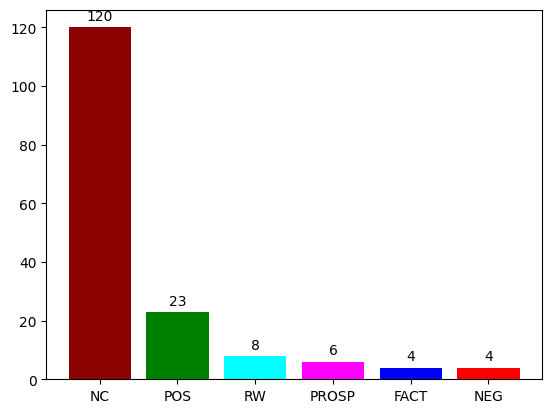

In [57]:
# barplot of the distribution of labels

bars = plt.bar(labels, counts, color = ["darkred", "green", "cyan", "magenta", "blue", "red"])
plt.bar_label(bars, padding = 3)
plt.show()

37 claims collectés pour 2 articles.

In [63]:
type(claims.at[0, "idx"])

numpy.int64

In [72]:
df = claims[claims["idx"].astype(str).str.startswith("8")]

for i, row in df.iterrows():
    text = row["text"]
    label = row["label"]

    if label != "NC":

        print(f"{label.ljust(6)}{text}")
        print()


FACT  Here we describe our system for this multi-format information extraction competition task.

POS   Finally,our system ranks No.4 on the test set leader-board of this multi-format information extraction task, and its F1 scores for the subtasks of relation extraction, event extractions of sentence-level and document-level are 79.887%, 85.179%, and 70.828% respectively.

RW    However, most researches only focus on extracting information in a single format, while lacking a unified †

POS   In our system, we use some effective methods to overcome these challenges.

FACT  Specifically, for the first one, we design a schema disintegration module to convert each multiple-O-values relation into several single-O-value relations, then use a voting based module to obtain the final relations.

RW    A representative Chinese DEE work is [17], whose DEE model contains two main components: a SEE model that extracts event arguments and event triggers from a sentence; and a DEE model that extracts

In [74]:
import json

with open("../data/cdb-idxmap_v2.json", "r") as f:
    idx_map = json.load(f)


In [75]:
idx_map["0"]

['ACL', 'O02-2002', 0]

In [79]:
idx_map["8054610"]

['arXiv', '2108.06957', 179]

In [77]:
claims

,idx,text,label
0,3075788,We propose a software architecture designed to...,FACT
1,3075789,The Modular Architecture for Conversational Ag...,POS
2,3075790,The architecture separates the domain of the c...,POS
3,3075793,Recent research in building sophisticated AIba...,RW
4,3075794,These models have been applied to a variety of...,RW
...,...,...,...
160,8054606,"These triples gives model wrong supervisions, ...",NEG
161,8054607,But this missing annotation issue is still an ...,PROSP
162,8054608,"Second, in the DEE subtask, how to process lon...",PROSP
163,8054609,"In addition, if two arguments of one event are...",NEG


# Third annotation trial

In [2]:
ANNO_DIR_PATH = "anno-results-4/"

task = AnnotationTask(
    title = "claims-classification",
    guidelines_path = "guidelines_v1.md",
    labels = ["CONTR", 
              "RES-experimental", "RES-analysis", "RES-knowledge",
              "LIM",
              "PROSP-directions", "PROSP-impact",
              "RW",
              "NC"],
    annotators = ["anno1", "anno2"],
)


aset = AnnotationSet(ANNO_DIR_PATH, task = task)

In [3]:
aset.compute_agreement_metrics()

In [4]:
aset.ia_metrics["cohen_kappa"]

,anno1,anno2
anno1,1.000000,0.572277
anno2,0.572277,1.000000


In [5]:
aset.ia_metrics["krippendorff_alpha"]

0.5716395621707665

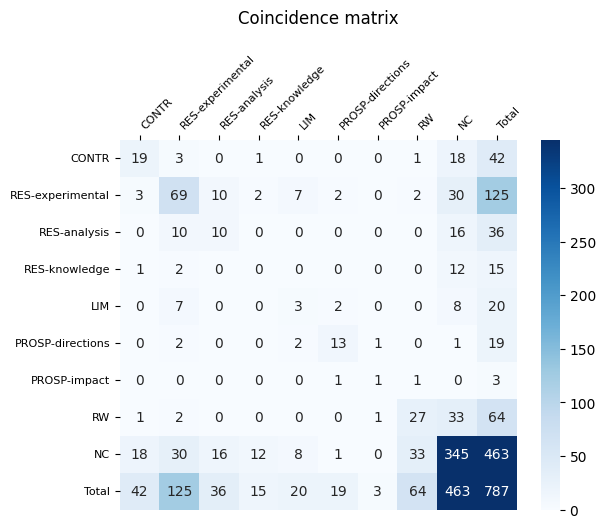

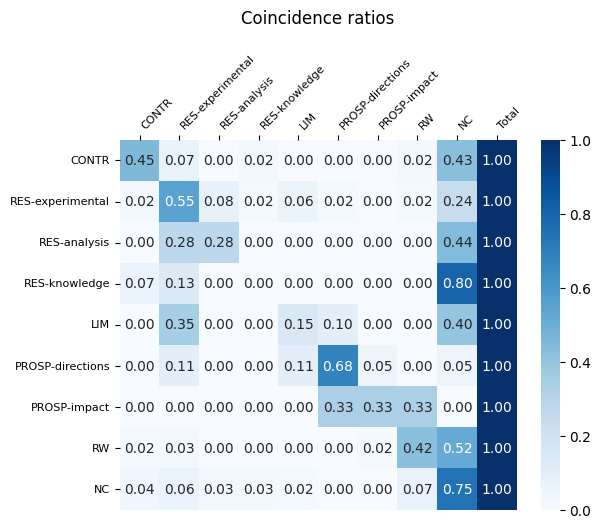

In [6]:
anno_pairs = aset.compute_coincidences(split_multi_labels = True)
AnnotationSet.plot_coincidence_matrices(anno_pairs, task.labels)

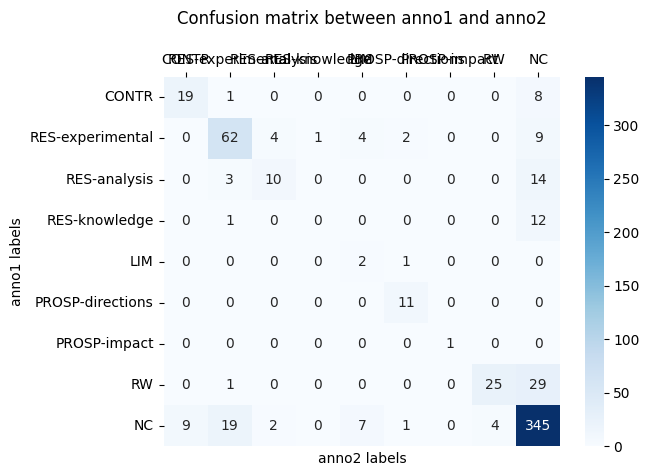

In [7]:
aset.plot_confusion_matrix_for_anno_pair(0, 1)

In [8]:
aset.stats

,CONTR,RES-experimental,RES-analysis,RES-knowledge,LIM,PROSP-directions,PROSP-impact,RW,NC,total,CONTR_rr,RES-experimental_rr,RES-analysis_rr,RES-knowledge_rr,LIM_rr,PROSP-directions_rr,PROSP-impact_rr,RW_rr,NC_rr,completion_r
anno1,30,89,28,14,4,13,1,58,389,622,0.048232,0.143087,0.045016,0.022508,0.006431,0.020900,0.001608,0.093248,0.625402,1.0
anno2,30,98,18,1,18,17,3,31,417,622,0.048232,0.157556,0.028939,0.001608,0.028939,0.027331,0.004823,0.049839,0.670418,1.0


In [9]:
aset.annotations["label_anno1"] = aset.annotations["label_anno1"].apply(lambda x: x.split("-")[0])
aset.annotations["label_anno2"] = aset.annotations["label_anno2"].apply(lambda x: x.split("-")[0])

aset.annotations

,idx,text,section,prev_text,prev_section,next_text,next_section,label_anno1,comments_anno1,label_anno2,comments_anno2
0,6042,This paper focuses on domain specific use of M...,abstract,NaN,NaN,We report on the feedback of post-editors usin...,abstract,NC,,CONTR,
1,6043,We report on the feedback of post-editors usin...,abstract,This paper focuses on domain specific use of M...,abstract,The post-editor profile defined by the LSP is ...,abstract,CONTR,,CONTR,
2,6044,The post-editor profile defined by the LSP is ...,abstract,We report on the feedback of post-editors usin...,abstract,The relation between the Translation Edit Rate...,abstract,NC,,NC,
3,6045,The relation between the Translation Edit Rate...,abstract,The post-editor profile defined by the LSP is ...,abstract,We find TER a candidate for an automatic metri...,abstract,NC,,CONTR,
4,6046,We find TER a candidate for an automatic metri...,abstract,The relation between the Translation Edit Rate...,abstract,LSP tests show 67% saved time in post-editing ...,abstract,NC,,RES,
...,...,...,...,...,...,...,...,...,...,...,...
617,6659,"In this paper, we propose ordered neurons, a n...",CONCLUSION,"Note that the results may not be comparable, b...",LOGICAL INFERENCE,"Based on this idea, we propose a novel recurre...",CONCLUSION,CONTR,,CONTR,
618,6660,"Based on this idea, we propose a novel recurre...",CONCLUSION,"In this paper, we propose ordered neurons, a n...",CONCLUSION,This brings recurrent neural networks closer t...,CONCLUSION,CONTR,,CONTR,
619,6661,This brings recurrent neural networks closer t...,CONCLUSION,"Based on this idea, we propose a novel recurre...",CONCLUSION,The model performance on unsupervised constitu...,CONCLUSION,CONTR,,CONTR,
620,6662,The model performance on unsupervised constitu...,CONCLUSION,This brings recurrent neural networks closer t...,CONCLUSION,The inductive bias also enables ON-LSTM to ach...,CONCLUSION,RES,,RES,


In [10]:
aset.compute_agreement_metrics()

In [11]:
aset.ia_metrics["cohen_kappa"]

,anno1,anno2
anno1,1.000000,0.598941
anno2,0.598941,1.000000


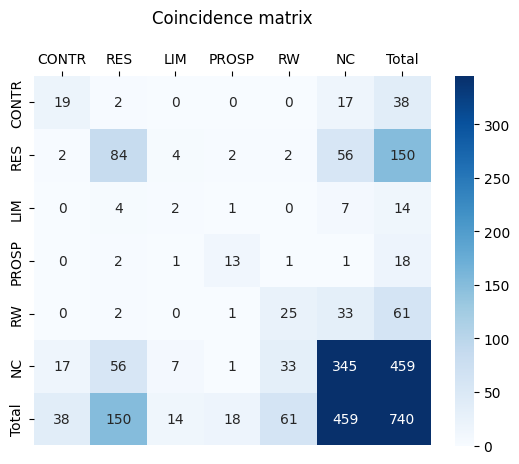

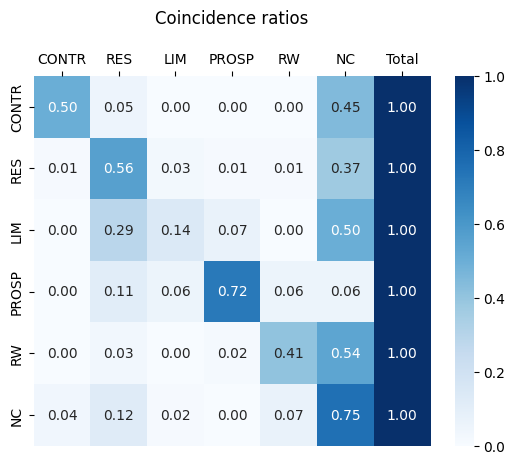

In [12]:
reduced_labels = ["CONTR", "RES", "LIM", "PROSP", "RW", "NC"]
anno_pairs = aset.compute_coincidences(split_multi_labels = False)
AnnotationSet.plot_coincidence_matrices(anno_pairs, reduced_labels)

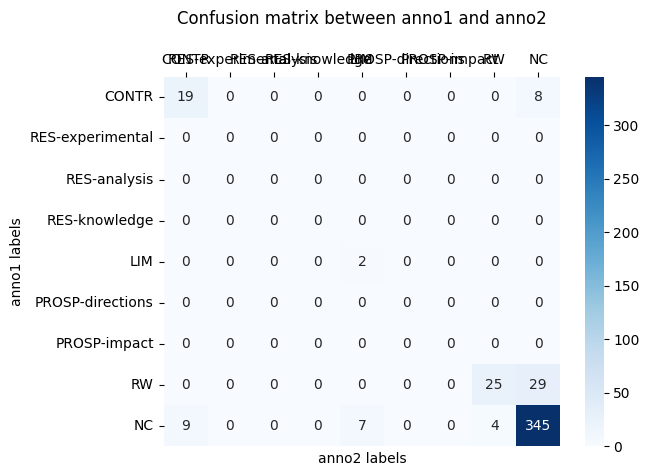

In [13]:
aset.plot_confusion_matrix_for_anno_pair(0, 1)

In [15]:
cons = aset.get_consensual_annotations()
cons

,idx,text,label
0,6043,We report on the feedback of post-editors usin...,CONTR
1,6044,The post-editor profile defined by the LSP is ...,NC
2,6047,LSP tests show 67% saved time in post-editing ...,RES
3,6048,"Finally, the use of weighted sub-domain phrase...",RES
4,6049,As part of a general strategy to strengthen co...,NC
...,...,...,...
483,6659,"In this paper, we propose ordered neurons, a n...",CONTR
484,6660,"Based on this idea, we propose a novel recurre...",CONTR
485,6661,This brings recurrent neural networks closer t...,CONTR
486,6662,The model performance on unsupervised constitu...,RES


In [17]:
ambig = aset.get_ambiguous_annotations()
ambig

,idx,text,section,prev_text,prev_section,next_text,next_section,label_anno1,comments_anno1,label_anno2,comments_anno2,maj_label,agreement,commented
0,6042,This paper focuses on domain specific use of M...,abstract,NaN,NaN,We report on the feedback of post-editors usin...,abstract,NC,,CONTR,,NC,False,False
3,6045,The relation between the Translation Edit Rate...,abstract,The post-editor profile defined by the LSP is ...,abstract,We find TER a candidate for an automatic metri...,abstract,NC,,CONTR,,NC,False,False
4,6046,We find TER a candidate for an automatic metri...,abstract,The relation between the Translation Edit Rate...,abstract,LSP tests show 67% saved time in post-editing ...,abstract,NC,,RES,,NC,False,False
8,6050,The aim of both projects has been to explore t...,Introduction,As part of a general strategy to strengthen co...,Introduction,The project goals were to find out not only wh...,Introduction,CONTR,,NC,,CONTR,False,False
9,6051,The project goals were to find out not only wh...,Introduction,The aim of both projects has been to explore t...,Introduction,The primary tasks of the involved translation ...,Introduction,CONTR,,NC,,CONTR,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,6584,The downsizing significantly reduces the numbe...,STRUCTURED GATING MECHANISM,"We repeat each dimension C times, before the e...",STRUCTURED GATING MECHANISM,"Therefore, every neuron within each C-sized ch...",STRUCTURED GATING MECHANISM,RES,,NC,,RES,False,False
591,6633,As the WSJ10 baselines are trained using POS t...,TARGETED SYNTACTIC EVALUATION,WSJ10 baselines are from Klein & Manning (2002...,TARGETED SYNTACTIC EVALUATION,Italics mark results that are worse than the r...,TARGETED SYNTACTIC EVALUATION,NC,,LIM,,NC,False,False
593,6635,"ber of units in the hidden states, which is in...",TARGETED SYNTACTIC EVALUATION,Italics mark results that are worse than the r...,TARGETED SYNTACTIC EVALUATION,We also notice that the results for NPI test c...,TARGETED SYNTACTIC EVALUATION,NC,,RES,,NC,False,False
598,6640,This task is based on a language that has a vo...,LOGICAL INFERENCE,We also analyze the model's performance on the...,LOGICAL INFERENCE,There are seven mutually exclusive logical rel...,LOGICAL INFERENCE,RES,,NC,,RES,False,False


# Fourth annotation trial

In [68]:
ANNO_DIR_PATH = "anno-results-5/"

task = AnnotationTask(
    title = "claims-classification",
    guidelines_path = None,
    labels = ["background-AIC", "outline-AIC",
              "contribution",
              "result", "position", "discussion",
              "limitation",
              "impact", "directions",
              "rw",
              "error",
              "nc"],
    annotators = ["anno1", "anno2"],
)


aset = AnnotationSet(ANNO_DIR_PATH, task = task)

In [69]:
aset.stats

,background-AIC,outline-AIC,contribution,result,position,discussion,limitation,impact,directions,rw,...,result_rr,position_rr,discussion_rr,limitation_rr,impact_rr,directions_rr,rw_rr,error_rr,nc_rr,completion_r
anno1,27,7,13,64,0,7,3,1,9,24,...,0.271186,0.000000,0.029661,0.012712,0.004237,0.038136,0.101695,0.084746,0.0,1.0
anno2,23,6,13,56,1,31,4,2,9,32,...,0.237288,0.004237,0.131356,0.016949,0.008475,0.038136,0.135593,0.122881,0.0,1.0


In [70]:
aset.annotations["label_anno1"] = aset.annotations["label_anno1"].apply(lambda x: "nc" if x == "" or x == "NC" else x)
aset.annotations["label_anno2"] = aset.annotations["label_anno2"].apply(lambda x: "nc" if x == "" or x == "NC" else x)
aset.compute_agreement_metrics()

In [71]:
aset.annotations["label_anno1"].unique()

array(['background-AIC', 'background-AIC#rw', 'contribution', 'result',
       'background-AIC#error#rw', 'nc', 'error', 'result#rw',
       'error#result#rw', 'discussion', 'discussion#error',
       'contribution#result', 'impact', 'directions', 'outline-AIC',
       'contribution#error', 'contribution#outline-AIC#rw',
       'contribution#rw', 'rw', 'error#result', 'limitation',
       'directions#rw', 'discussion#error#rw'], dtype=object)

In [72]:
aset.annotations[aset.annotations["label_anno1"] == ""]

,idx,text,prev_text,prev_section,next_text,next_section,label_anno1,comments_anno1,label_anno2,comments_anno2


In [73]:
aset.ia_metrics["cohen_kappa"]

,anno1,anno2
anno1,1.000000,0.651242
anno2,0.651242,1.000000


In [74]:
aset.ia_metrics["krippendorff_alpha"]

0.6506015717365603

In [75]:
aset.annotations["error"] = aset.annotations.apply(lambda x: "error" in x["label_anno1"] or "error" in x["label_anno2"], axis = 1)
aset.annotations["rw"] = aset.annotations.apply(lambda x: "rw" in x["label_anno1"] or "rw" in x["label_anno2"], axis = 1)

aset.annotations["label_anno1"] = aset.annotations["label_anno1"].apply(lambda x: "#".join([l for l in x.split('#') if l not in ["error", "rw"]]))
aset.annotations["label_anno2"] = aset.annotations["label_anno2"].apply(lambda x: "#".join([l for l in x.split('#')if l not in ["error", "rw"]]))

aset.annotations["label_anno1"] = aset.annotations["label_anno1"].apply(lambda x: "nc" if x == "" else x)
aset.annotations["label_anno2"] = aset.annotations["label_anno2"].apply(lambda x: "nc" if x == "" else x)

aset.compute_agreement_metrics()

In [76]:
aset.annotations["label_anno1"].unique()

array(['background-AIC', 'contribution', 'result', 'nc', 'discussion',
       'contribution#result', 'impact', 'directions', 'outline-AIC',
       'contribution#outline-AIC', 'limitation'], dtype=object)

In [77]:
aset.ia_metrics["cohen_kappa"]

,anno1,anno2
anno1,1.000000,0.689882
anno2,0.689882,1.000000


In [78]:
aset.ia_metrics["krippendorff_alpha"]

0.6889263961253393

In [80]:
aset.annotations["label_anno1"] = aset.annotations["label_anno1"].apply(lambda x: "#".join(list(set([l.replace("discussion", "result").replace("position", "result") for l in x.split('#')]))))
aset.annotations["label_anno2"] = aset.annotations["label_anno2"].apply(lambda x: "#".join(list(set([l.replace("discussion", "result").replace("position", "result") for l in x.split('#')]))))


aset.annotations["label_anno2"].unique()

array(['background-AIC', 'contribution', 'result', 'nc', 'impact',
       'directions', 'outline-AIC', 'background-AIC#result',
       'contribution#result', 'limitation', 'impact#result'], dtype=object)

In [81]:
aset.compute_agreement_metrics()
aset.ia_metrics["cohen_kappa"]

,anno1,anno2
anno1,1.000000,0.738298
anno2,0.738298,1.000000


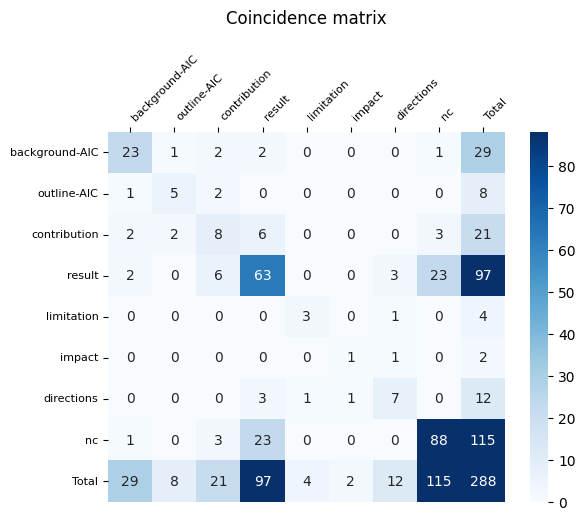

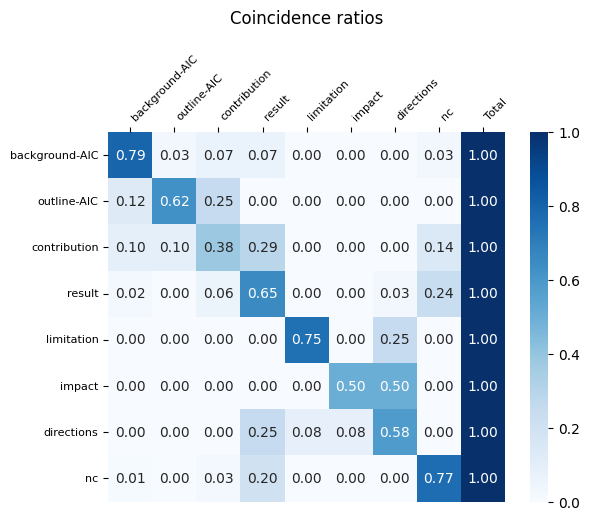

In [82]:
anno_pairs = aset.compute_coincidences(split_multi_labels = True)
AnnotationSet.plot_coincidence_matrices(anno_pairs, task.labels)

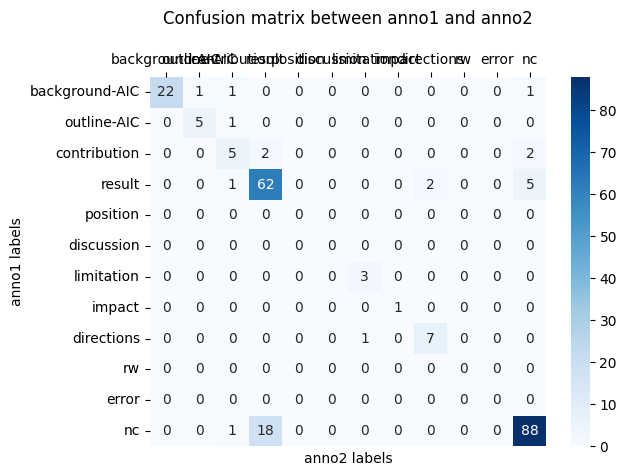

In [83]:
aset.plot_confusion_matrix_for_anno_pair(0, 1)

In [11]:
aset.annotations[(aset.annotations["text"].str.startswith("{G}lob{E}nc")) & (aset.annotations["prev_section"])]

,idx,text,prev_text,prev_section,next_text,next_section,label_anno1,comments_anno1,label_anno2,comments_anno2
0,9859,{G}lob{E}nc: Quantifying Global Token Attribut...,NaN,NaN,While self-attention patterns were initially d...,abstract,background-AIC,,background-AIC,
1,9860,{G}lob{E}nc: Quantifying Global Token Attribut...,There has been a growing interest in interpret...,abstract,This paper introduces a novel token attributio...,abstract,background-AIC#rw,,background-AIC#rw,
2,9861,{G}lob{E}nc: Quantifying Global Token Attribut...,While self-attention patterns were initially d...,abstract,Through extensive quantitative and qualitative...,abstract,contribution,,contribution,
3,9862,{G}lob{E}nc: Quantifying Global Token Attribut...,This paper introduces a novel token attributio...,abstract,Our experiments reveal that incorporating almo...,abstract,result,ou contribution ?,result,
4,9863,{G}lob{E}nc: Quantifying Global Token Attribut...,Through extensive quantitative and qualitative...,abstract,Our global attribution analysis significantly ...,abstract,result,ou contribution ?,result,
...,...,...,...,...,...,...,...,...,...,...
113,9972,{G}lob{E}nc: Quantifying Global Token Attribut...,Our evaluation of different analysis methods p...,Conclusions,"Additionally, using a newly proposed and impro...",Conclusions,result,,result,
114,9973,{G}lob{E}nc: Quantifying Global Token Attribut...,"Furthermore, our in-depth analysis suggested t...",Conclusions,This is consistent with our global observations.,Conclusions,contribution#result,"""newly proposed and improved version of HTA"" =...",result,
115,9974,{G}lob{E}nc: Quantifying Global Token Attribut...,"Additionally, using a newly proposed and impro...",Conclusions,Quantifying global input token attribution bas...,Conclusions,NC,,discussion,
116,9975,{G}lob{E}nc: Quantifying Global Token Attribut...,This is consistent with our global observations.,Conclusions,"In future work, we plan to apply our global an...",Conclusions,impact,,impact,


In [2]:
df = pd.read_csv("to-annotate-CLEM-120.csv")
df.head()

,text,doc_id,paper_title,paper_structure,year,prev_text,prev_section,next_text,next_section,label
0,Multi-Task Active Learning for Neural Semantic...,3435904,Multi-Task Active Learning for Neural Semantic...,0. abstract\n1. Introduction\n2. Related Work\...,2018,NaN,NaN,"In this paper, we propose a Multi-Task Active ...",abstract,NaN
1,Multi-Task Active Learning for Neural Semantic...,3435905,Multi-Task Active Learning for Neural Semantic...,0. abstract\n1. Introduction\n2. Related Work\...,2018,Most Semantic Role Labeling (SRL) approaches a...,abstract,We evaluate our approach on Indonesian convers...,abstract,NaN
2,Multi-Task Active Learning for Neural Semantic...,3435906,Multi-Task Active Learning for Neural Semantic...,0. abstract\n1. Introduction\n2. Related Work\...,2018,"In this paper, we propose a Multi-Task Active ...",abstract,Our experiments show that multi-task active le...,abstract,NaN
3,Multi-Task Active Learning for Neural Semantic...,3435907,Multi-Task Active Learning for Neural Semantic...,0. abstract\n1. Introduction\n2. Related Work\...,2018,We evaluate our approach on Indonesian convers...,abstract,"According to our results, active learning is m...",abstract,NaN
4,Multi-Task Active Learning for Neural Semantic...,3435908,Multi-Task Active Learning for Neural Semantic...,0. abstract\n1. Introduction\n2. Related Work\...,2018,Our experiments show that multi-task active le...,abstract,We also introduce a new dataset for SRL in Ind...,abstract,NaN


In [3]:
import random
titles = list(df["paper_title"].unique())
rd_titles = random.sample(titles, 1)
print(rd_titles)

['Re-evaluating Automatic Summarization with {BLEU} and 192 Shades of {ROUGE}']


In [4]:
df_2 = df[df["paper_title"].isin(rd_titles)]
print(df_2.shape)
df_2

(182, 10)


,text,doc_id,paper_title,paper_structure,year,prev_text,prev_section,next_text,next_section,label
709,Re-evaluating Automatic Summarization with {BL...,1862661,Re-evaluating Automatic Summarization with {BL...,0. abstract\n1. Introduction\n2. Related Work\...,2015,NaN,NaN,We outline an evaluation methodology that over...,abstract,NaN
710,Re-evaluating Automatic Summarization with {BL...,1862662,Re-evaluating Automatic Summarization with {BL...,0. abstract\n1. Introduction\n2. Related Work\...,2015,We provide an analysis of current evaluation m...,abstract,Our evaluation reveals for the first time whic...,abstract,NaN
711,Re-evaluating Automatic Summarization with {BL...,1862663,Re-evaluating Automatic Summarization with {BL...,0. abstract\n1. Introduction\n2. Related Work\...,2015,We outline an evaluation methodology that over...,abstract,We subsequently replicate a recent large-scale...,abstract,NaN
712,Re-evaluating Automatic Summarization with {BL...,1862664,Re-evaluating Automatic Summarization with {BL...,0. abstract\n1. Introduction\n2. Related Work\...,2015,Our evaluation reveals for the first time whic...,abstract,Automatic metrics of summarization evaluation ...,Introduction,NaN
713,Re-evaluating Automatic Summarization with {BL...,1862665,Re-evaluating Automatic Summarization with {BL...,0. abstract\n1. Introduction\n2. Related Work\...,2015,We subsequently replicate a recent large-scale...,abstract,Automatic evaluation in MT and summarization h...,Introduction,NaN
...,...,...,...,...,...,...,...,...,...,...
886,Re-evaluating Automatic Summarization with {BL...,1862838,Re-evaluating Automatic Summarization with {BL...,0. abstract\n1. Introduction\n2. Related Work\...,2015,Results reveal superior variants of metrics di...,Conclusions,"In addition, BLEU achieves strongest correlati...",Conclusions,NaN
887,Re-evaluating Automatic Summarization with {BL...,1862839,Re-evaluating Automatic Summarization with {BL...,0. abstract\n1. Introduction\n2. Related Work\...,2015,Replication of a recent evaluation of state-of...,Conclusions,NaN,NaN,NaN
888,==============================================...,1862839,Re-evaluating Automatic Summarization with {BL...,0. abstract\n1. Introduction\n2. Related Work\...,2015,NaN,NaN,NaN,NaN,NaN
889,==============================================...,1862839,Re-evaluating Automatic Summarization with {BL...,0. abstract\n1. Introduction\n2. Related Work\...,2015,NaN,NaN,NaN,NaN,NaN


In [6]:
df_2_1 = pd.read_csv("to-annotate-6-2.csv")
df_2_1 = df_2_1[df_2_1["paper_title"].str.startswith("Template")]

df = pd.concat([df_2_1, df_2])
print(df.shape)

df.head()

(289, 10)


,text,doc_id,paper_title,paper_structure,year,prev_text,prev_section,next_text,next_section,label
0,Template-Based Question Generation from Retrie...,457835,Template-Based Question Generation from Retrie...,0. abstract\n1. Introduction\n2. Experiments\n...,2020,NaN,NaN,A common approach to QA has been to fine-tune ...,abstract,NaN
1,Template-Based Question Generation from Retrie...,457836,Template-Based Question Generation from Retrie...,0. abstract\n1. Introduction\n2. Experiments\n...,2020,Question Answering (QA) is in increasing deman...,abstract,"This paradigm, however, relies on scarce, and ...",abstract,NaN
2,Template-Based Question Generation from Retrie...,457837,Template-Based Question Generation from Retrie...,0. abstract\n1. Introduction\n2. Experiments\n...,2020,A common approach to QA has been to fine-tune ...,abstract,We propose an unsupervised approach to trainin...,abstract,NaN
3,Template-Based Question Generation from Retrie...,457838,Template-Based Question Generation from Retrie...,0. abstract\n1. Introduction\n2. Experiments\n...,2020,"This paradigm, however, relies on scarce, and ...",abstract,We show that generating questions for QA train...,abstract,NaN
4,Template-Based Question Generation from Retrie...,457839,Template-Based Question Generation from Retrie...,0. abstract\n1. Introduction\n2. Experiments\n...,2020,We propose an unsupervised approach to trainin...,abstract,Training a QA model on this data gives a relat...,abstract,NaN


In [9]:
df.to_csv("to-annotate-6-3.csv", index = False)

In [11]:
df = pd.read_csv("to-annotate-CLEM-120.csv")

In [12]:
for i, row in df[df["year"] < 1994].iterrows():
    print(row["text"].split("=")[-1])


In this paper we describe a method for automatically discovering subsets of contextual factors which, taken together, axe useful for predicting the realizations, or pronunciations, of English words for continuous speech recognition.

A decision tree is used for organizing contextual descriptions of phonological variation.

This representation enables us to categorize different realizations according to the context in which they appear in the corpus.

In addition, this organization permits us to consider simplifications such as pruning and branch clustering, leading to parsimonious descriptions that better predict allophones in these contexts.

We created trees to examine the working assumption that preceding phoneme and following phoneme provide important contexts, as exemplified by the use of triphones in hidden Maxkov models; our results were in general accordance with the assumption.

However, we found that other contexts also play a significant role in phoneme realizations.

Phono

In [14]:
df_clem_1 = pd.read_csv("anno-results-6/anno2-1.csv")

df_clem_1 = df_clem_1[df_clem_1.paper_title.str.startswith("Template")]
print(df_clem_1.shape)

(107, 12)


In [15]:
df_clem_2 = pd.read_csv("anno-results-6/anno2.csv")

df_clem_2 = df_clem_2[~(df_clem_2.paper_title.str.startswith("Template"))]
print(df_clem_2.shape)

(182, 12)


In [17]:
df_clem = pd.concat([df_clem_1, df_clem_2])
df_clem.to_csv("anno-results-6/anno2.csv", index = False)

In [18]:
ANNO_DIR_PATH = "anno-results-6/"

task = AnnotationTask(
    title = "claims-classification",
    guidelines_path = None,
    labels = ["context-AIC", "outline-AIC",
              "contribution-AIC",
              "result",
              "limitation",
              "impact", "directions",
              "rw",
              "error",
              "nc"],
    annotators = ["anno1", "anno2"],
)


aset = AnnotationSet(ANNO_DIR_PATH, task = task)

In [19]:
aset.stats

,context-AIC,outline-AIC,contribution-AIC,result,limitation,impact,directions,rw,error,nc,...,outline-AIC_rr,contribution-AIC_rr,result_rr,limitation_rr,impact_rr,directions_rr,rw_rr,error_rr,nc_rr,completion_r
anno1,26,0,41,51,1,0,4,10,4,0,...,0.0,0.141869,0.176471,0.00346,0.00000,0.013841,0.034602,0.013841,0.0,1.0
anno2,28,0,41,55,0,1,5,16,6,0,...,0.0,0.141869,0.190311,0.00000,0.00346,0.017301,0.055363,0.020761,0.0,1.0


In [20]:
aset.annotations["label_anno1"] = aset.annotations["label_anno1"].apply(lambda x: "nc" if x == "" or x == "NC" else x)
aset.annotations["label_anno2"] = aset.annotations["label_anno2"].apply(lambda x: "nc" if x == "" or x == "NC" else x)
aset.compute_agreement_metrics()

In [21]:
aset.annotations["label_anno1"].unique()

array(['context-AIC', 'contribution-AIC', 'result', 'context-AIC#rw',
       'context-AIC#error', 'contribution-AIC#rw', 'nc',
       'directions#result', 'directions#limitation', 'directions',
       'result#rw', 'contribution-AIC#result', 'error', 'error#result'],
      dtype=object)

In [22]:
aset.ia_metrics["cohen_kappa"]

,anno1,anno2
anno1,1.000000,0.784365
anno2,0.784365,1.000000


In [23]:
aset.ia_metrics["krippendorff_alpha"]

0.7845572044040211

In [24]:
aset.annotations["error"] = aset.annotations.apply(lambda x: "error" in x["label_anno1"] or "error" in x["label_anno2"], axis = 1)
aset.annotations["rw"] = aset.annotations.apply(lambda x: "rw" in x["label_anno1"] or "rw" in x["label_anno2"], axis = 1)

aset.annotations["label_anno1"] = aset.annotations["label_anno1"].apply(lambda x: "#".join([l for l in x.split('#') if l not in ["error", "rw"]]))
aset.annotations["label_anno2"] = aset.annotations["label_anno2"].apply(lambda x: "#".join([l for l in x.split('#')if l not in ["error", "rw"]]))

aset.annotations["label_anno1"] = aset.annotations["label_anno1"].apply(lambda x: "nc" if x == "" else x)
aset.annotations["label_anno2"] = aset.annotations["label_anno2"].apply(lambda x: "nc" if x == "" else x)

aset.compute_agreement_metrics()

In [25]:
aset.ia_metrics["cohen_kappa"]

,anno1,anno2
anno1,1.000000,0.811682
anno2,0.811682,1.000000


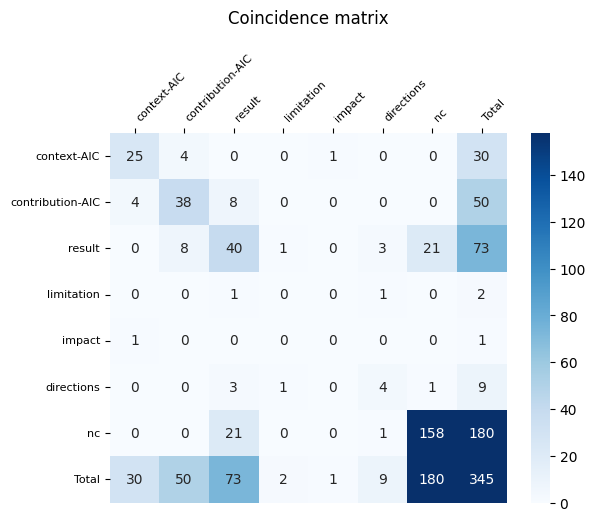

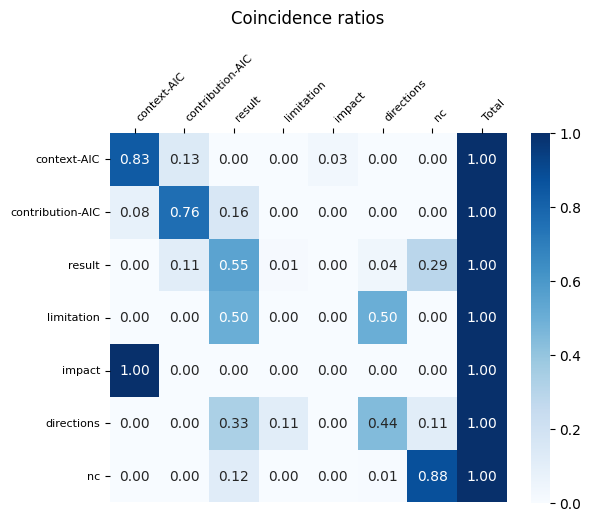

In [26]:
anno_pairs = aset.compute_coincidences(split_multi_labels = True)
AnnotationSet.plot_coincidence_matrices(anno_pairs, task.labels)

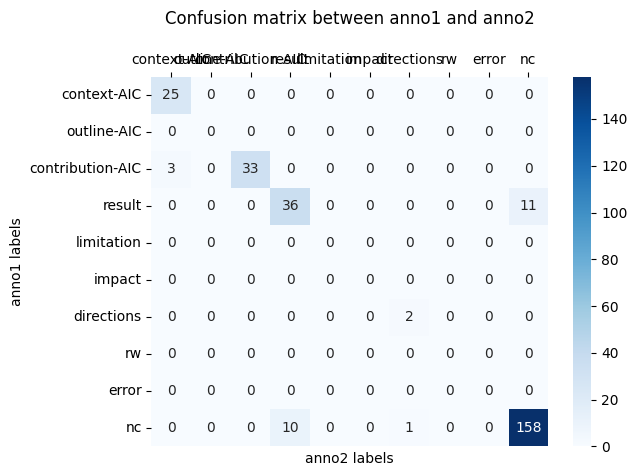

In [27]:
aset.plot_confusion_matrix_for_anno_pair(0, 1)

In [28]:
aset.stats

,context-AIC,outline-AIC,contribution-AIC,result,limitation,impact,directions,rw,error,nc,...,outline-AIC_rr,contribution-AIC_rr,result_rr,limitation_rr,impact_rr,directions_rr,rw_rr,error_rr,nc_rr,completion_r
anno1,26,0,41,51,1,0,4,10,4,0,...,0.0,0.141869,0.176471,0.00346,0.00000,0.013841,0.034602,0.013841,0.0,1.0
anno2,28,0,41,55,0,1,5,16,6,0,...,0.0,0.141869,0.190311,0.00000,0.00346,0.017301,0.055363,0.020761,0.0,1.0


In [31]:
aset.annotations.to_excel("anno-results-6/annotations.xlsx", index = False)